# Rainfall Weather Forecasting

# Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given
location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere
at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather
observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


# Dataset Description:
Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importimg the dataset
df=pd.read_csv('weather.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
#checking the shape of the dataset
df.shape

(8425, 23)

In [4]:
#Checking info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [5]:
#Checking statistical summary of the dataset
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [6]:
#Splitting the Date_of_Journey column into day,month and year
df[['Year','Month','Day']] = df['Date'].str.split('-',expand = True)

In [7]:
#Dropping the columns
df.drop(columns = ['Date'],axis=1,inplace=True)

In [8]:
#checking top rows of the dataset
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,01
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,02
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,03
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,04
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,05


In [9]:
#Checking the value counts of WindGustDir columns
df.WindGustDir.value_counts()

N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64

In [10]:
# Filling Nan Values in WindGustDir object column using mode
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

In [11]:
#Checking the values of WindDir9am columns
df.WindDir9am.value_counts()

N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64

In [12]:
# Filling Nan Values in WindDir9am object column using mode
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])

In [13]:
#Checking the values of WindDir3pm columns
df.WindDir3pm.value_counts()

SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    370
NNE    365
NNW    306
Name: WindDir3pm, dtype: int64

In [14]:
# Filling Nan Values in WindDir3pm object column using mode
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [15]:
# Checking the value counts of RainToday column
df.RainToday.value_counts()

No     6195
Yes    1990
Name: RainToday, dtype: int64

In [16]:
# Filling Nan Values in RainToday object column using mode
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

In [17]:
#checking the value counts of RainTomorrow column
df.RainTomorrow.value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [18]:

# Filling Nan Values in RainTomorrow object column using mode
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
#Tranforming the objects values into numerical value using LabelEncoder
df1 = le.fit_transform(df['Location'])
pd.Series(df1)
df['Location'] = df1
df1 = le.fit_transform(df['WindGustDir'])
pd.Series(df1)
df['WindGustDir'] = df1
df1 = le.fit_transform(df['WindDir9am'])
pd.Series(df1)
df['WindDir9am'] = df1
df1 = le.fit_transform(df['WindDir3pm'])
pd.Series(df1)
df['WindDir3pm'] = df1
df1 = le.fit_transform(df['RainToday'])
pd.Series(df1)
df['RainToday'] = df1
df1 = le.fit_transform(df['RainTomorrow'])
pd.Series(df1)
df['RainTomorrow'] = df1

In [22]:
#Checking that the object columns are converted into numerical one's or not
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,1007.1,8.0,NaN,16.9,21.8,0,0,2008,12,01
1,1,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,1007.8,NaN,NaN,17.2,24.3,0,0,2008,12,02
2,1,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,1008.7,NaN,2.0,21.0,23.2,0,0,2008,12,03
3,1,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,1012.8,NaN,NaN,18.1,26.5,0,0,2008,12,04
4,1,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,05


In [24]:
# Dataset contains null values need to transform with mean value of column using SimpleImputer
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'mean')
impu =imp.fit_transform(df)
df1 = pd.DataFrame(impu,columns = df.columns)

In [25]:
df1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1.0,13.4,22.9,0.6,5.389395,7.632205,13.0,44.0,13.0,14.0,...,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0,2008.0,12.0,1.0
1,1.0,7.4,25.1,0.0,5.389395,7.632205,14.0,44.0,6.0,15.0,...,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0,2008.0,12.0,2.0
2,1.0,12.9,25.7,0.0,5.389395,7.632205,15.0,46.0,13.0,15.0,...,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0,2008.0,12.0,3.0
3,1.0,9.2,28.0,0.0,5.389395,7.632205,4.0,24.0,9.0,0.0,...,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0,2008.0,12.0,4.0
4,1.0,17.5,32.3,1.0,5.389395,7.632205,13.0,41.0,1.0,7.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,2008.0,12.0,5.0


In [26]:
#Checking the shape of the dataset
df1.shape

(8425, 25)

In [27]:
#splitting labels and features
x = df1.drop(columns = ['RainTomorrow'])
y = df1['RainTomorrow']

In [28]:
x.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,1.0,13.4,22.9,0.6,5.389395,7.632205,13.0,44.0,13.0,14.0,...,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0,2008.0,12.0,1.0
1,1.0,7.4,25.1,0.0,5.389395,7.632205,14.0,44.0,6.0,15.0,...,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0,2008.0,12.0,2.0
2,1.0,12.9,25.7,0.0,5.389395,7.632205,15.0,46.0,13.0,15.0,...,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0,2008.0,12.0,3.0
3,1.0,9.2,28.0,0.0,5.389395,7.632205,4.0,24.0,9.0,0.0,...,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0,2008.0,12.0,4.0
4,1.0,17.5,32.3,1.0,5.389395,7.632205,13.0,41.0,1.0,7.0,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,2008.0,12.0,5.0


In [29]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: RainTomorrow, dtype: float64

In [32]:
#Selecting features using SelectKBest feature selection
from sklearn.feature_selection import SelectKBest,f_classif
best_features = SelectKBest(score_func = f_classif, k=18)
fit = best_features.fit(x,y)
data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(x.columns)

feature_scores =pd.concat([data_columns , data_scores], axis = 1)
feature_scores.columns = ['feature_Name','Score']
print(feature_scores.nlargest(18,'Score'))

     feature_Name        Score
13    Humidity3pm  2077.580374
17       Cloud3pm  1133.279550
5        Sunshine  1013.558821
20      RainToday   914.359293
16       Cloud9am   710.684993
12    Humidity9am   668.806828
3        Rainfall   428.495920
19        Temp3pm   328.717019
7   WindGustSpeed   315.894957
14    Pressure9am   232.764071
2         MaxTemp   201.592980
15    Pressure3pm   156.930342
1         MinTemp    73.393560
10   WindSpeed9am    39.459412
4     Evaporation    29.434515
11   WindSpeed3pm    24.239735
6     WindGustDir    22.690229
8      WindDir9am     9.104906


In [33]:
#Selecting the Best_feature columns based on the score
x_new = x[['Humidity3pm','RainToday','Cloud3pm','Sunshine','Cloud9am','Humidity9am','Rainfall','WindGustSpeed','Temp3pm','Pressure9am','MaxTemp','Pressure3pm','MinTemp','Month','WindSpeed9am','WindSpeed3pm','Evaporation','WindGustDir']]

In [34]:
x_new.shape

(8425, 18)

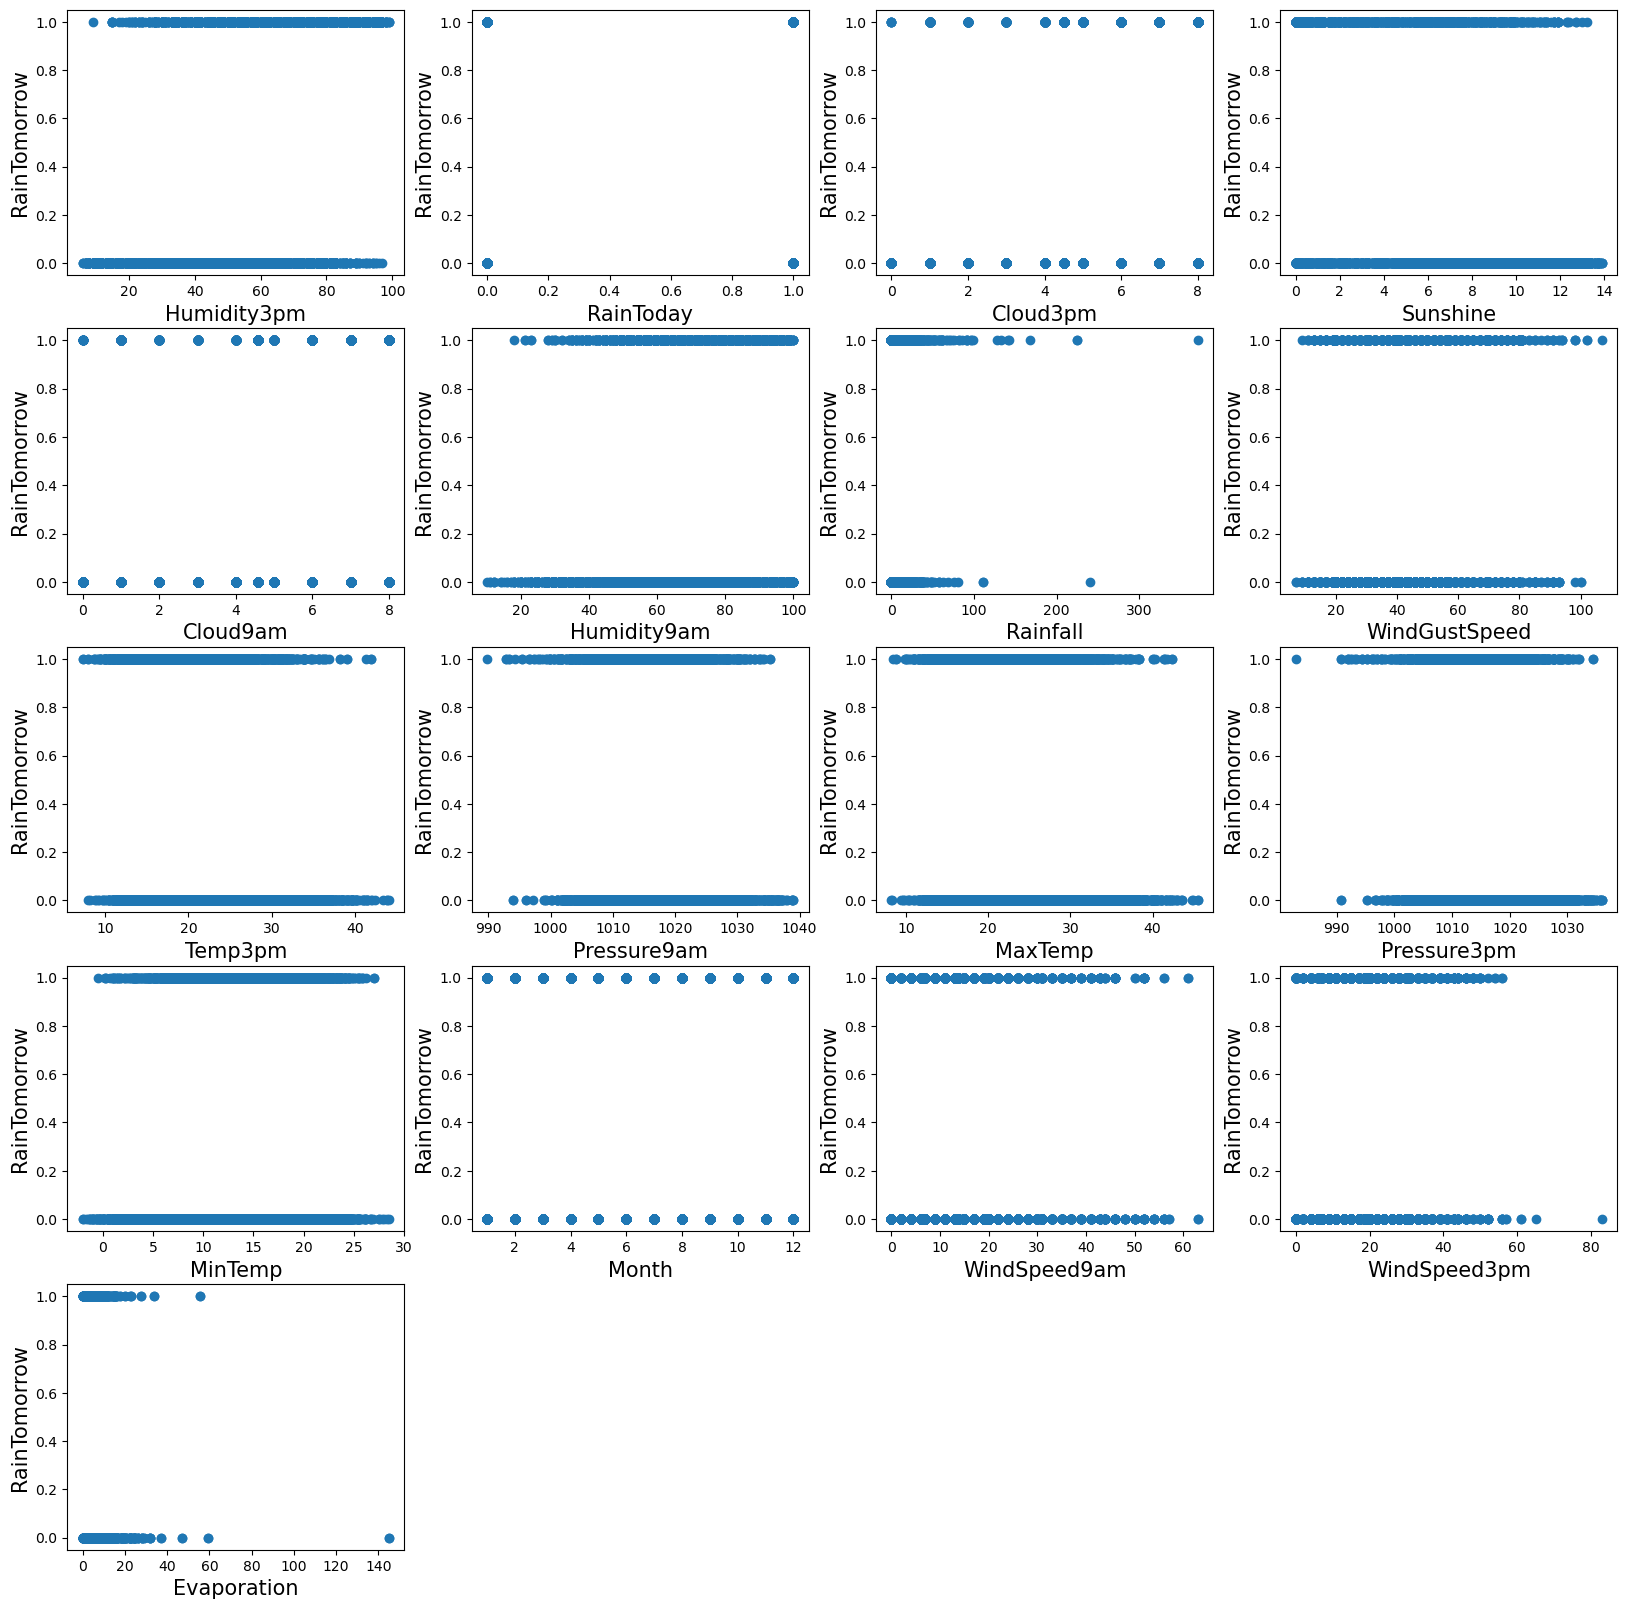

In [35]:
#Checking the any relation between labels and feature
plt.figure(figsize = (20,20))
plt_num = 1

for column in x_new:
    if plt_num<18:
        ax = plt.subplot(5,4,plt_num)
        plt.scatter(x_new[column],y)
        plt.xlabel(column,fontsize = 15)
        plt.ylabel('RainTomorrow',fontsize = 15)
    plt_num+=1
plt.show()

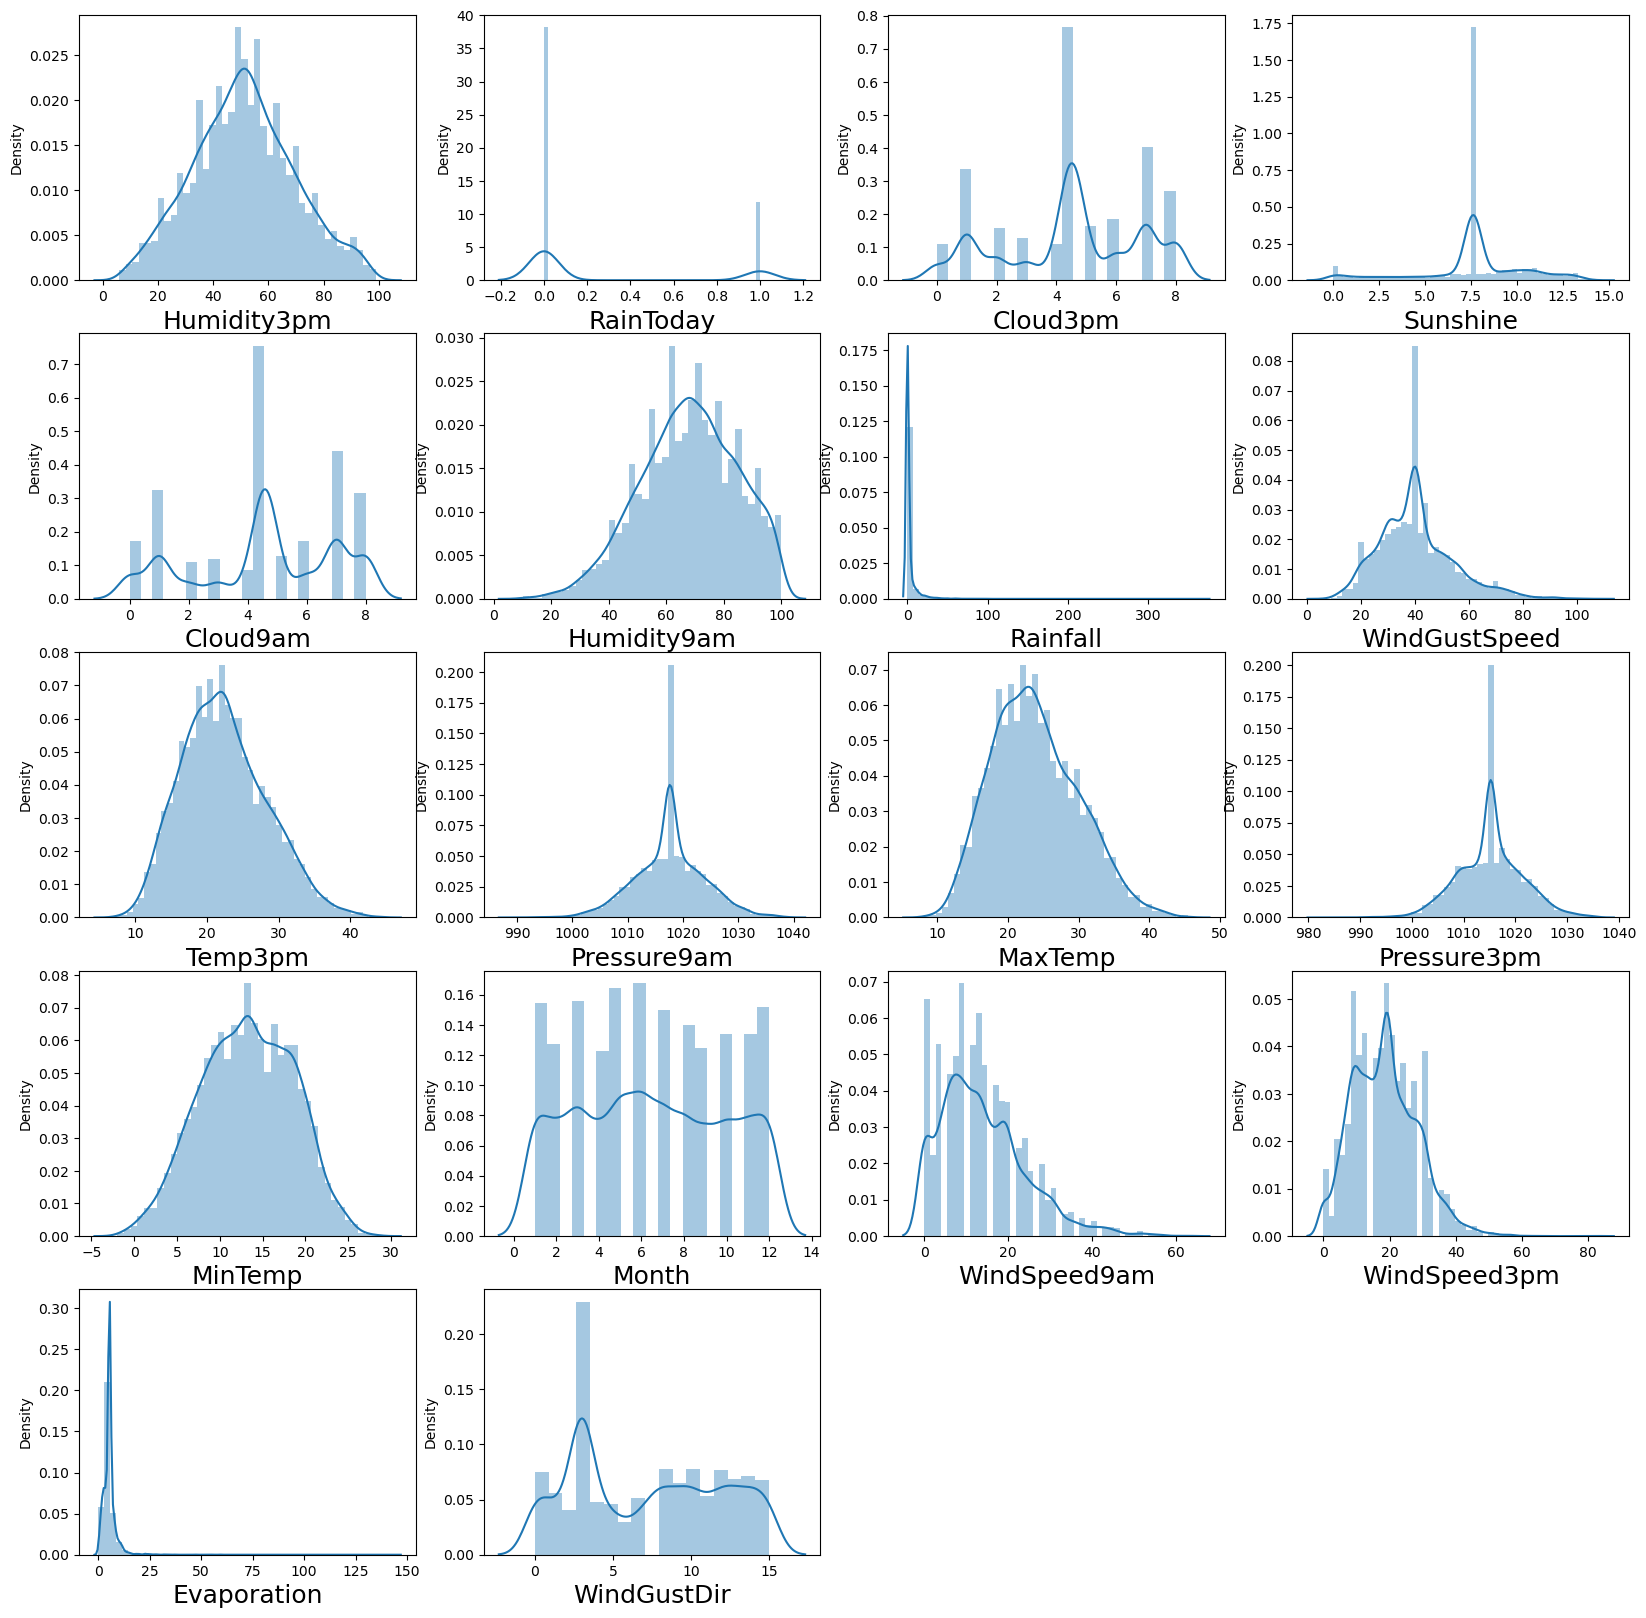

In [36]:
#Plotting the distribution plot for data normal distribution
plt.figure(figsize = (20,20))
plt_num =1

for column in x_new:
    if plt_num<=20:
        sx = plt.subplot(5,4,plt_num)
        sns.distplot(x_new[column])
        plt.xlabel(column,fontsize = 18)
    plt_num+=1
plt.show()

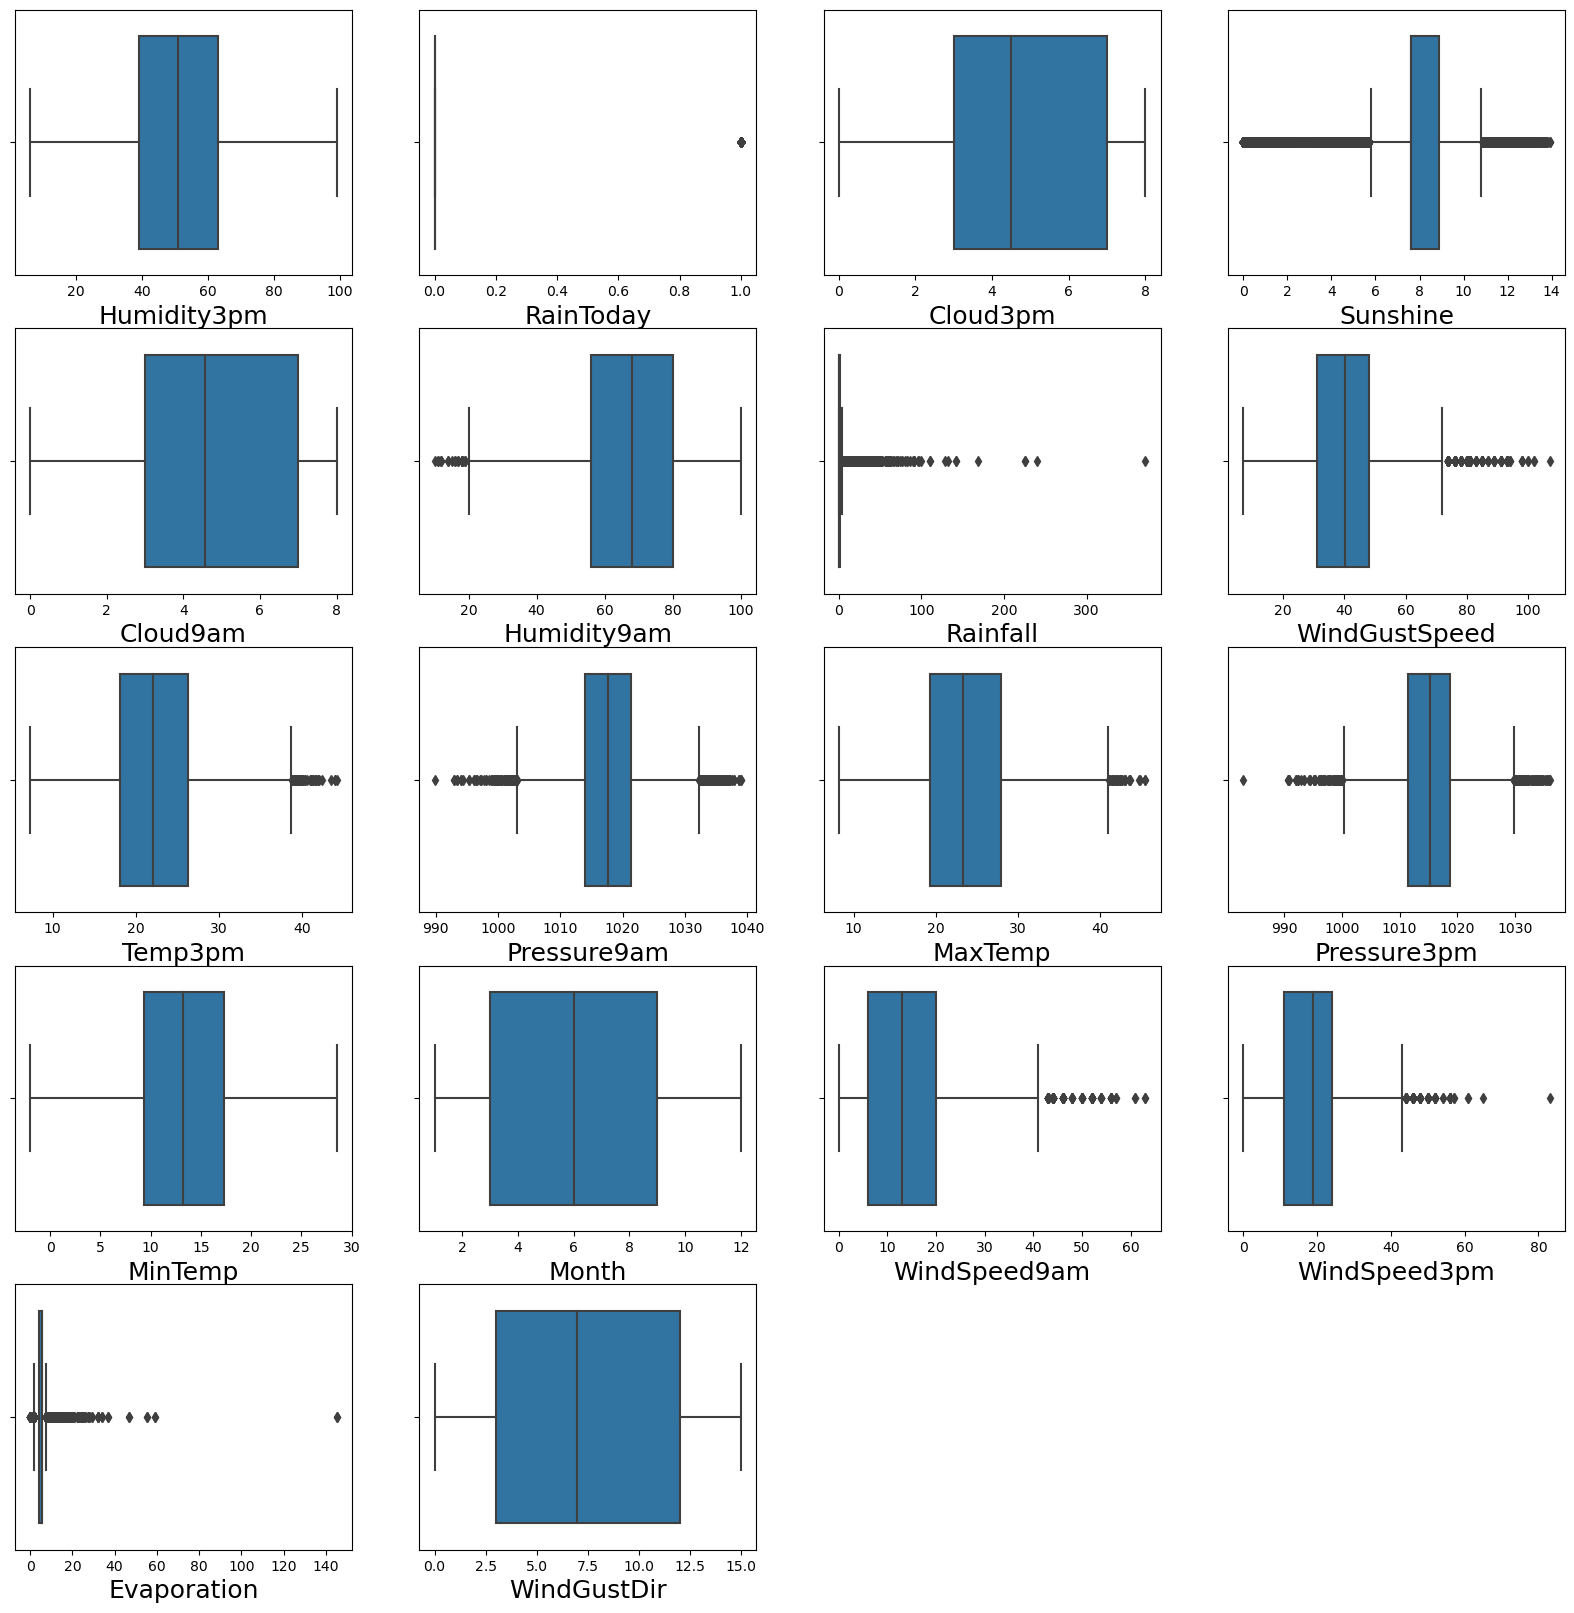

In [37]:
## plotting box plot to check the skewness and outliers in the data set
plt.figure(figsize = (20,20))
plt_num =1

for column in x_new:
    if plt_num<=20:
        sx = plt.subplot(5,4,plt_num)
        sns.boxplot(x_new[column])
        plt.xlabel(column,fontsize = 18)
    plt_num+=1
plt.show()

In [38]:
##finding the outliers 
q1 = df_new.quantile(0.25)
q3 = df_new.quantile(0.75)
iqr = q3- q1

In [39]:
# Removing outliers in the Sunshine columns
sun = (q3.Sunshine + (0.5 * iqr.Sunshine))
sun

index = np.where(x_new['Sunshine']>sun)
index

x_new = x_new.drop(x_new.index[index])
df_new.shape

x_new.reset_index()

,index,Humidity3pm,RainToday,Cloud3pm,Sunshine,Cloud9am,Humidity9am,Rainfall,WindGustSpeed,Temp3pm,Pressure9am,MaxTemp,Pressure3pm,MinTemp,Month,WindSpeed9am,WindSpeed3pm,Evaporation,WindGustDir
0,0,22.0,0.0,4.503183,7.632205,8.000000,71.0,0.6,44.000000,21.8,1007.7,22.900000,1007.1,13.4,12.0,20.0,24.0,5.389395,13.0
1,1,25.0,0.0,4.503183,7.632205,4.566622,44.0,0.0,44.000000,24.3,1010.6,25.100000,1007.8,7.4,12.0,4.0,22.0,5.389395,14.0
2,2,30.0,0.0,2.000000,7.632205,4.566622,38.0,0.0,46.000000,23.2,1007.6,25.700000,1008.7,12.9,12.0,19.0,26.0,5.389395,15.0
3,3,16.0,0.0,4.503183,7.632205,4.566622,45.0,0.0,24.000000,26.5,1017.6,28.000000,1012.8,9.2,12.0,11.0,9.0,5.389395,4.0
4,4,33.0,0.0,8.000000,7.632205,7.000000,82.0,1.0,41.000000,29.7,1010.8,32.300000,1006.0,17.5,12.0,7.0,20.0,5.389395,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6635,8420,24.0,0.0,4.503183,7.632205,4.566622,51.0,0.0,31.000000,22.4,1024.6,23.400000,1020.3,2.8,6.0,13.0,11.0,5.389395,0.0
6636,8421,21.0,0.0,4.503183,7.632205,4.566622,56.0,0.0,22.000000,24.5,1023.5,25.300000,1019.1,3.6,6.0,13.0,9.0,5.389395,6.0
6637,8422,24.0,0.0,4.503183,7.632205,4.566622,53.0,0.0,37.000000,26.1,1021.0,26.900000,1016.8,5.4,6.0,9.0,9.0,5.389395,3.0
6638,8423,24.0,0.0,2.000000,7.632205,3.000000,51.0,0.0,28.000000,26.0,1019.4,27.000000,1016.5,7.8,6.0,13.0,7.0,5.389395,9.0


In [40]:
# Removing outliers in the Rainfall columns
rai = (q3.Rainfall + (0.5 * iqr.Rainfall))
rai

index = np.where(x_new['Rainfall']>rai)
index

x_new = x_new.drop(x_new.index[index])
df_new.shape

x_new.reset_index()

,index,Humidity3pm,RainToday,Cloud3pm,Sunshine,Cloud9am,Humidity9am,Rainfall,WindGustSpeed,Temp3pm,Pressure9am,MaxTemp,Pressure3pm,MinTemp,Month,WindSpeed9am,WindSpeed3pm,Evaporation,WindGustDir
0,0,22.0,0.0,4.503183,7.632205,8.000000,71.0,0.6,44.000000,21.8,1007.7,22.900000,1007.1,13.4,12.0,20.0,24.0,5.389395,13.0
1,1,25.0,0.0,4.503183,7.632205,4.566622,44.0,0.0,44.000000,24.3,1010.6,25.100000,1007.8,7.4,12.0,4.0,22.0,5.389395,14.0
2,2,30.0,0.0,2.000000,7.632205,4.566622,38.0,0.0,46.000000,23.2,1007.6,25.700000,1008.7,12.9,12.0,19.0,26.0,5.389395,15.0
3,3,16.0,0.0,4.503183,7.632205,4.566622,45.0,0.0,24.000000,26.5,1017.6,28.000000,1012.8,9.2,12.0,11.0,9.0,5.389395,4.0
4,4,33.0,0.0,8.000000,7.632205,7.000000,82.0,1.0,41.000000,29.7,1010.8,32.300000,1006.0,17.5,12.0,7.0,20.0,5.389395,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4909,8420,24.0,0.0,4.503183,7.632205,4.566622,51.0,0.0,31.000000,22.4,1024.6,23.400000,1020.3,2.8,6.0,13.0,11.0,5.389395,0.0
4910,8421,21.0,0.0,4.503183,7.632205,4.566622,56.0,0.0,22.000000,24.5,1023.5,25.300000,1019.1,3.6,6.0,13.0,9.0,5.389395,6.0
4911,8422,24.0,0.0,4.503183,7.632205,4.566622,53.0,0.0,37.000000,26.1,1021.0,26.900000,1016.8,5.4,6.0,9.0,9.0,5.389395,3.0
4912,8423,24.0,0.0,2.000000,7.632205,3.000000,51.0,0.0,28.000000,26.0,1019.4,27.000000,1016.5,7.8,6.0,13.0,7.0,5.389395,9.0


In [41]:
# Removing outliers in the WindGustSpeed columns
win = (q3.WindGustSpeed + (0.5 * iqr.WindGustSpeed))
win

index = np.where(x_new['WindGustSpeed']>win)
index

x_new = x_new.drop(x_new.index[index])
df_new.shape

x_new.reset_index()

,index,Humidity3pm,RainToday,Cloud3pm,Sunshine,Cloud9am,Humidity9am,Rainfall,WindGustSpeed,Temp3pm,Pressure9am,MaxTemp,Pressure3pm,MinTemp,Month,WindSpeed9am,WindSpeed3pm,Evaporation,WindGustDir
0,0,22.0,0.0,4.503183,7.632205,8.000000,71.0,0.6,44.000000,21.8,1007.7,22.900000,1007.1,13.4,12.0,20.0,24.0,5.389395,13.0
1,1,25.0,0.0,4.503183,7.632205,4.566622,44.0,0.0,44.000000,24.3,1010.6,25.100000,1007.8,7.4,12.0,4.0,22.0,5.389395,14.0
2,2,30.0,0.0,2.000000,7.632205,4.566622,38.0,0.0,46.000000,23.2,1007.6,25.700000,1008.7,12.9,12.0,19.0,26.0,5.389395,15.0
3,3,16.0,0.0,4.503183,7.632205,4.566622,45.0,0.0,24.000000,26.5,1017.6,28.000000,1012.8,9.2,12.0,11.0,9.0,5.389395,4.0
4,4,33.0,0.0,8.000000,7.632205,7.000000,82.0,1.0,41.000000,29.7,1010.8,32.300000,1006.0,17.5,12.0,7.0,20.0,5.389395,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,8420,24.0,0.0,4.503183,7.632205,4.566622,51.0,0.0,31.000000,22.4,1024.6,23.400000,1020.3,2.8,6.0,13.0,11.0,5.389395,0.0
4407,8421,21.0,0.0,4.503183,7.632205,4.566622,56.0,0.0,22.000000,24.5,1023.5,25.300000,1019.1,3.6,6.0,13.0,9.0,5.389395,6.0
4408,8422,24.0,0.0,4.503183,7.632205,4.566622,53.0,0.0,37.000000,26.1,1021.0,26.900000,1016.8,5.4,6.0,9.0,9.0,5.389395,3.0
4409,8423,24.0,0.0,2.000000,7.632205,3.000000,51.0,0.0,28.000000,26.0,1019.4,27.000000,1016.5,7.8,6.0,13.0,7.0,5.389395,9.0


In [42]:
# Removing outliers in the Temp3pm columns
te = (q3.Temp3pm + (0.5 * iqr.Temp3pm))
te

index = np.where(x_new['Temp3pm']>te)
index

x_new = x_new.drop(x_new.index[index])
df_new.shape

x_new.reset_index()

,index,Humidity3pm,RainToday,Cloud3pm,Sunshine,Cloud9am,Humidity9am,Rainfall,WindGustSpeed,Temp3pm,Pressure9am,MaxTemp,Pressure3pm,MinTemp,Month,WindSpeed9am,WindSpeed3pm,Evaporation,WindGustDir
0,0,22.0,0.0,4.503183,7.632205,8.000000,71.0,0.6,44.000000,21.8,1007.7,22.900000,1007.1,13.4,12.0,20.0,24.0,5.389395,13.0
1,1,25.0,0.0,4.503183,7.632205,4.566622,44.0,0.0,44.000000,24.3,1010.6,25.100000,1007.8,7.4,12.0,4.0,22.0,5.389395,14.0
2,2,30.0,0.0,2.000000,7.632205,4.566622,38.0,0.0,46.000000,23.2,1007.6,25.700000,1008.7,12.9,12.0,19.0,26.0,5.389395,15.0
3,3,16.0,0.0,4.503183,7.632205,4.566622,45.0,0.0,24.000000,26.5,1017.6,28.000000,1012.8,9.2,12.0,11.0,9.0,5.389395,4.0
4,4,33.0,0.0,8.000000,7.632205,7.000000,82.0,1.0,41.000000,29.7,1010.8,32.300000,1006.0,17.5,12.0,7.0,20.0,5.389395,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4080,8420,24.0,0.0,4.503183,7.632205,4.566622,51.0,0.0,31.000000,22.4,1024.6,23.400000,1020.3,2.8,6.0,13.0,11.0,5.389395,0.0
4081,8421,21.0,0.0,4.503183,7.632205,4.566622,56.0,0.0,22.000000,24.5,1023.5,25.300000,1019.1,3.6,6.0,13.0,9.0,5.389395,6.0
4082,8422,24.0,0.0,4.503183,7.632205,4.566622,53.0,0.0,37.000000,26.1,1021.0,26.900000,1016.8,5.4,6.0,9.0,9.0,5.389395,3.0
4083,8423,24.0,0.0,2.000000,7.632205,3.000000,51.0,0.0,28.000000,26.0,1019.4,27.000000,1016.5,7.8,6.0,13.0,7.0,5.389395,9.0


In [43]:
# Removing outliers in the Pressure9am columns
pe = (q3.Pressure9am + (0.5 * iqr.Pressure9am))
pe

index = np.where(x_new['Pressure9am']>pe)
index

x_new = x_new.drop(x_new.index[index])
df_new.shape

x_new.reset_index()

,index,Humidity3pm,RainToday,Cloud3pm,Sunshine,Cloud9am,Humidity9am,Rainfall,WindGustSpeed,Temp3pm,Pressure9am,MaxTemp,Pressure3pm,MinTemp,Month,WindSpeed9am,WindSpeed3pm,Evaporation,WindGustDir
0,0,22.0,0.0,4.503183,7.632205,8.000000,71.0,0.6,44.000000,21.8,1007.7,22.900000,1007.1,13.4,12.0,20.0,24.0,5.389395,13.0
1,1,25.0,0.0,4.503183,7.632205,4.566622,44.0,0.0,44.000000,24.3,1010.6,25.100000,1007.8,7.4,12.0,4.0,22.0,5.389395,14.0
2,2,30.0,0.0,2.000000,7.632205,4.566622,38.0,0.0,46.000000,23.2,1007.6,25.700000,1008.7,12.9,12.0,19.0,26.0,5.389395,15.0
3,3,16.0,0.0,4.503183,7.632205,4.566622,45.0,0.0,24.000000,26.5,1017.6,28.000000,1012.8,9.2,12.0,11.0,9.0,5.389395,4.0
4,4,33.0,0.0,8.000000,7.632205,7.000000,82.0,1.0,41.000000,29.7,1010.8,32.300000,1006.0,17.5,12.0,7.0,20.0,5.389395,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,8420,24.0,0.0,4.503183,7.632205,4.566622,51.0,0.0,31.000000,22.4,1024.6,23.400000,1020.3,2.8,6.0,13.0,11.0,5.389395,0.0
3391,8421,21.0,0.0,4.503183,7.632205,4.566622,56.0,0.0,22.000000,24.5,1023.5,25.300000,1019.1,3.6,6.0,13.0,9.0,5.389395,6.0
3392,8422,24.0,0.0,4.503183,7.632205,4.566622,53.0,0.0,37.000000,26.1,1021.0,26.900000,1016.8,5.4,6.0,9.0,9.0,5.389395,3.0
3393,8423,24.0,0.0,2.000000,7.632205,3.000000,51.0,0.0,28.000000,26.0,1019.4,27.000000,1016.5,7.8,6.0,13.0,7.0,5.389395,9.0


In [44]:
# Removing outliers in the MaxTemp columns
ma = (q3.MaxTemp + (0.5 * iqr.MaxTemp))
ma

index = np.where(x_new['MaxTemp']>ma)
index

x_new = x_new.drop(x_new.index[index])
df_new.shape

x_new.reset_index()

,index,Humidity3pm,RainToday,Cloud3pm,Sunshine,Cloud9am,Humidity9am,Rainfall,WindGustSpeed,Temp3pm,Pressure9am,MaxTemp,Pressure3pm,MinTemp,Month,WindSpeed9am,WindSpeed3pm,Evaporation,WindGustDir
0,0,22.0,0.0,4.503183,7.632205,8.000000,71.0,0.6,44.000000,21.8,1007.7,22.900000,1007.1,13.4,12.0,20.0,24.0,5.389395,13.0
1,1,25.0,0.0,4.503183,7.632205,4.566622,44.0,0.0,44.000000,24.3,1010.6,25.100000,1007.8,7.4,12.0,4.0,22.0,5.389395,14.0
2,2,30.0,0.0,2.000000,7.632205,4.566622,38.0,0.0,46.000000,23.2,1007.6,25.700000,1008.7,12.9,12.0,19.0,26.0,5.389395,15.0
3,3,16.0,0.0,4.503183,7.632205,4.566622,45.0,0.0,24.000000,26.5,1017.6,28.000000,1012.8,9.2,12.0,11.0,9.0,5.389395,4.0
4,4,33.0,0.0,8.000000,7.632205,7.000000,82.0,1.0,41.000000,29.7,1010.8,32.300000,1006.0,17.5,12.0,7.0,20.0,5.389395,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356,8420,24.0,0.0,4.503183,7.632205,4.566622,51.0,0.0,31.000000,22.4,1024.6,23.400000,1020.3,2.8,6.0,13.0,11.0,5.389395,0.0
3357,8421,21.0,0.0,4.503183,7.632205,4.566622,56.0,0.0,22.000000,24.5,1023.5,25.300000,1019.1,3.6,6.0,13.0,9.0,5.389395,6.0
3358,8422,24.0,0.0,4.503183,7.632205,4.566622,53.0,0.0,37.000000,26.1,1021.0,26.900000,1016.8,5.4,6.0,9.0,9.0,5.389395,3.0
3359,8423,24.0,0.0,2.000000,7.632205,3.000000,51.0,0.0,28.000000,26.0,1019.4,27.000000,1016.5,7.8,6.0,13.0,7.0,5.389395,9.0


In [45]:
# Removing outliers in the Pressure3pm columns
press = (q3.Pressure3pm + (0.5 * iqr.Pressure3pm))
press

index = np.where(x_new['Pressure3pm']>press)
index

x_new = x_new.drop(x_new.index[index])
df_new.shape

x_new.reset_index()

,index,Humidity3pm,RainToday,Cloud3pm,Sunshine,Cloud9am,Humidity9am,Rainfall,WindGustSpeed,Temp3pm,Pressure9am,MaxTemp,Pressure3pm,MinTemp,Month,WindSpeed9am,WindSpeed3pm,Evaporation,WindGustDir
0,0,22.0,0.0,4.503183,7.632205,8.000000,71.0,0.6,44.000000,21.8,1007.7,22.900000,1007.1,13.4,12.0,20.0,24.0,5.389395,13.0
1,1,25.0,0.0,4.503183,7.632205,4.566622,44.0,0.0,44.000000,24.3,1010.6,25.100000,1007.8,7.4,12.0,4.0,22.0,5.389395,14.0
2,2,30.0,0.0,2.000000,7.632205,4.566622,38.0,0.0,46.000000,23.2,1007.6,25.700000,1008.7,12.9,12.0,19.0,26.0,5.389395,15.0
3,3,16.0,0.0,4.503183,7.632205,4.566622,45.0,0.0,24.000000,26.5,1017.6,28.000000,1012.8,9.2,12.0,11.0,9.0,5.389395,4.0
4,4,33.0,0.0,8.000000,7.632205,7.000000,82.0,1.0,41.000000,29.7,1010.8,32.300000,1006.0,17.5,12.0,7.0,20.0,5.389395,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,8420,24.0,0.0,4.503183,7.632205,4.566622,51.0,0.0,31.000000,22.4,1024.6,23.400000,1020.3,2.8,6.0,13.0,11.0,5.389395,0.0
3298,8421,21.0,0.0,4.503183,7.632205,4.566622,56.0,0.0,22.000000,24.5,1023.5,25.300000,1019.1,3.6,6.0,13.0,9.0,5.389395,6.0
3299,8422,24.0,0.0,4.503183,7.632205,4.566622,53.0,0.0,37.000000,26.1,1021.0,26.900000,1016.8,5.4,6.0,9.0,9.0,5.389395,3.0
3300,8423,24.0,0.0,2.000000,7.632205,3.000000,51.0,0.0,28.000000,26.0,1019.4,27.000000,1016.5,7.8,6.0,13.0,7.0,5.389395,9.0


In [46]:
# Removing outliers in the WindSpeed9am columns
wind = (q3.WindSpeed9am + (0.5 * iqr.WindSpeed9am))
wind

index = np.where(x_new['WindSpeed9am']>wind)
index

x_new = x_new.drop(x_new.index[index])
df_new.shape

x_new.reset_index()

,index,Humidity3pm,RainToday,Cloud3pm,Sunshine,Cloud9am,Humidity9am,Rainfall,WindGustSpeed,Temp3pm,Pressure9am,MaxTemp,Pressure3pm,MinTemp,Month,WindSpeed9am,WindSpeed3pm,Evaporation,WindGustDir
0,0,22.0,0.0,4.503183,7.632205,8.000000,71.0,0.6,44.000000,21.8,1007.7,22.900000,1007.1,13.4,12.0,20.0,24.0,5.389395,13.0
1,1,25.0,0.0,4.503183,7.632205,4.566622,44.0,0.0,44.000000,24.3,1010.6,25.100000,1007.8,7.4,12.0,4.0,22.0,5.389395,14.0
2,2,30.0,0.0,2.000000,7.632205,4.566622,38.0,0.0,46.000000,23.2,1007.6,25.700000,1008.7,12.9,12.0,19.0,26.0,5.389395,15.0
3,3,16.0,0.0,4.503183,7.632205,4.566622,45.0,0.0,24.000000,26.5,1017.6,28.000000,1012.8,9.2,12.0,11.0,9.0,5.389395,4.0
4,4,33.0,0.0,8.000000,7.632205,7.000000,82.0,1.0,41.000000,29.7,1010.8,32.300000,1006.0,17.5,12.0,7.0,20.0,5.389395,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,8420,24.0,0.0,4.503183,7.632205,4.566622,51.0,0.0,31.000000,22.4,1024.6,23.400000,1020.3,2.8,6.0,13.0,11.0,5.389395,0.0
3108,8421,21.0,0.0,4.503183,7.632205,4.566622,56.0,0.0,22.000000,24.5,1023.5,25.300000,1019.1,3.6,6.0,13.0,9.0,5.389395,6.0
3109,8422,24.0,0.0,4.503183,7.632205,4.566622,53.0,0.0,37.000000,26.1,1021.0,26.900000,1016.8,5.4,6.0,9.0,9.0,5.389395,3.0
3110,8423,24.0,0.0,2.000000,7.632205,3.000000,51.0,0.0,28.000000,26.0,1019.4,27.000000,1016.5,7.8,6.0,13.0,7.0,5.389395,9.0


In [47]:
# Removing outliers in the WindSpeed3pm columns
wind1 = (q3.WindSpeed3pm + (0.5 * iqr.WindSpeed3pm))
wind1

index = np.where(x_new['WindSpeed3pm']>wind1)
index

x_new = x_new.drop(x_new.index[index])
df_new.shape

x_new.reset_index()

,index,Humidity3pm,RainToday,Cloud3pm,Sunshine,Cloud9am,Humidity9am,Rainfall,WindGustSpeed,Temp3pm,Pressure9am,MaxTemp,Pressure3pm,MinTemp,Month,WindSpeed9am,WindSpeed3pm,Evaporation,WindGustDir
0,0,22.0,0.0,4.503183,7.632205,8.000000,71.0,0.6,44.000000,21.8,1007.7,22.900000,1007.1,13.4,12.0,20.0,24.0,5.389395,13.0
1,1,25.0,0.0,4.503183,7.632205,4.566622,44.0,0.0,44.000000,24.3,1010.6,25.100000,1007.8,7.4,12.0,4.0,22.0,5.389395,14.0
2,2,30.0,0.0,2.000000,7.632205,4.566622,38.0,0.0,46.000000,23.2,1007.6,25.700000,1008.7,12.9,12.0,19.0,26.0,5.389395,15.0
3,3,16.0,0.0,4.503183,7.632205,4.566622,45.0,0.0,24.000000,26.5,1017.6,28.000000,1012.8,9.2,12.0,11.0,9.0,5.389395,4.0
4,4,33.0,0.0,8.000000,7.632205,7.000000,82.0,1.0,41.000000,29.7,1010.8,32.300000,1006.0,17.5,12.0,7.0,20.0,5.389395,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2956,8420,24.0,0.0,4.503183,7.632205,4.566622,51.0,0.0,31.000000,22.4,1024.6,23.400000,1020.3,2.8,6.0,13.0,11.0,5.389395,0.0
2957,8421,21.0,0.0,4.503183,7.632205,4.566622,56.0,0.0,22.000000,24.5,1023.5,25.300000,1019.1,3.6,6.0,13.0,9.0,5.389395,6.0
2958,8422,24.0,0.0,4.503183,7.632205,4.566622,53.0,0.0,37.000000,26.1,1021.0,26.900000,1016.8,5.4,6.0,9.0,9.0,5.389395,3.0
2959,8423,24.0,0.0,2.000000,7.632205,3.000000,51.0,0.0,28.000000,26.0,1019.4,27.000000,1016.5,7.8,6.0,13.0,7.0,5.389395,9.0


In [48]:
# Removing outliers in the Evaporation columns
evp = (q3.Evaporation + (0.5 * iqr.Evaporation))
evp

index = np.where(x_new['Evaporation']>evp)
index

x_new = x_new.drop(x_new.index[index])
df_new.shape

x_new.reset_index()

,index,Humidity3pm,RainToday,Cloud3pm,Sunshine,Cloud9am,Humidity9am,Rainfall,WindGustSpeed,Temp3pm,Pressure9am,MaxTemp,Pressure3pm,MinTemp,Month,WindSpeed9am,WindSpeed3pm,Evaporation,WindGustDir
0,0,22.0,0.0,4.503183,7.632205,8.000000,71.0,0.6,44.000000,21.8,1007.7,22.900000,1007.1,13.4,12.0,20.0,24.0,5.389395,13.0
1,1,25.0,0.0,4.503183,7.632205,4.566622,44.0,0.0,44.000000,24.3,1010.6,25.100000,1007.8,7.4,12.0,4.0,22.0,5.389395,14.0
2,2,30.0,0.0,2.000000,7.632205,4.566622,38.0,0.0,46.000000,23.2,1007.6,25.700000,1008.7,12.9,12.0,19.0,26.0,5.389395,15.0
3,3,16.0,0.0,4.503183,7.632205,4.566622,45.0,0.0,24.000000,26.5,1017.6,28.000000,1012.8,9.2,12.0,11.0,9.0,5.389395,4.0
4,4,33.0,0.0,8.000000,7.632205,7.000000,82.0,1.0,41.000000,29.7,1010.8,32.300000,1006.0,17.5,12.0,7.0,20.0,5.389395,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,8420,24.0,0.0,4.503183,7.632205,4.566622,51.0,0.0,31.000000,22.4,1024.6,23.400000,1020.3,2.8,6.0,13.0,11.0,5.389395,0.0
2665,8421,21.0,0.0,4.503183,7.632205,4.566622,56.0,0.0,22.000000,24.5,1023.5,25.300000,1019.1,3.6,6.0,13.0,9.0,5.389395,6.0
2666,8422,24.0,0.0,4.503183,7.632205,4.566622,53.0,0.0,37.000000,26.1,1021.0,26.900000,1016.8,5.4,6.0,9.0,9.0,5.389395,3.0
2667,8423,24.0,0.0,2.000000,7.632205,3.000000,51.0,0.0,28.000000,26.0,1019.4,27.000000,1016.5,7.8,6.0,13.0,7.0,5.389395,9.0


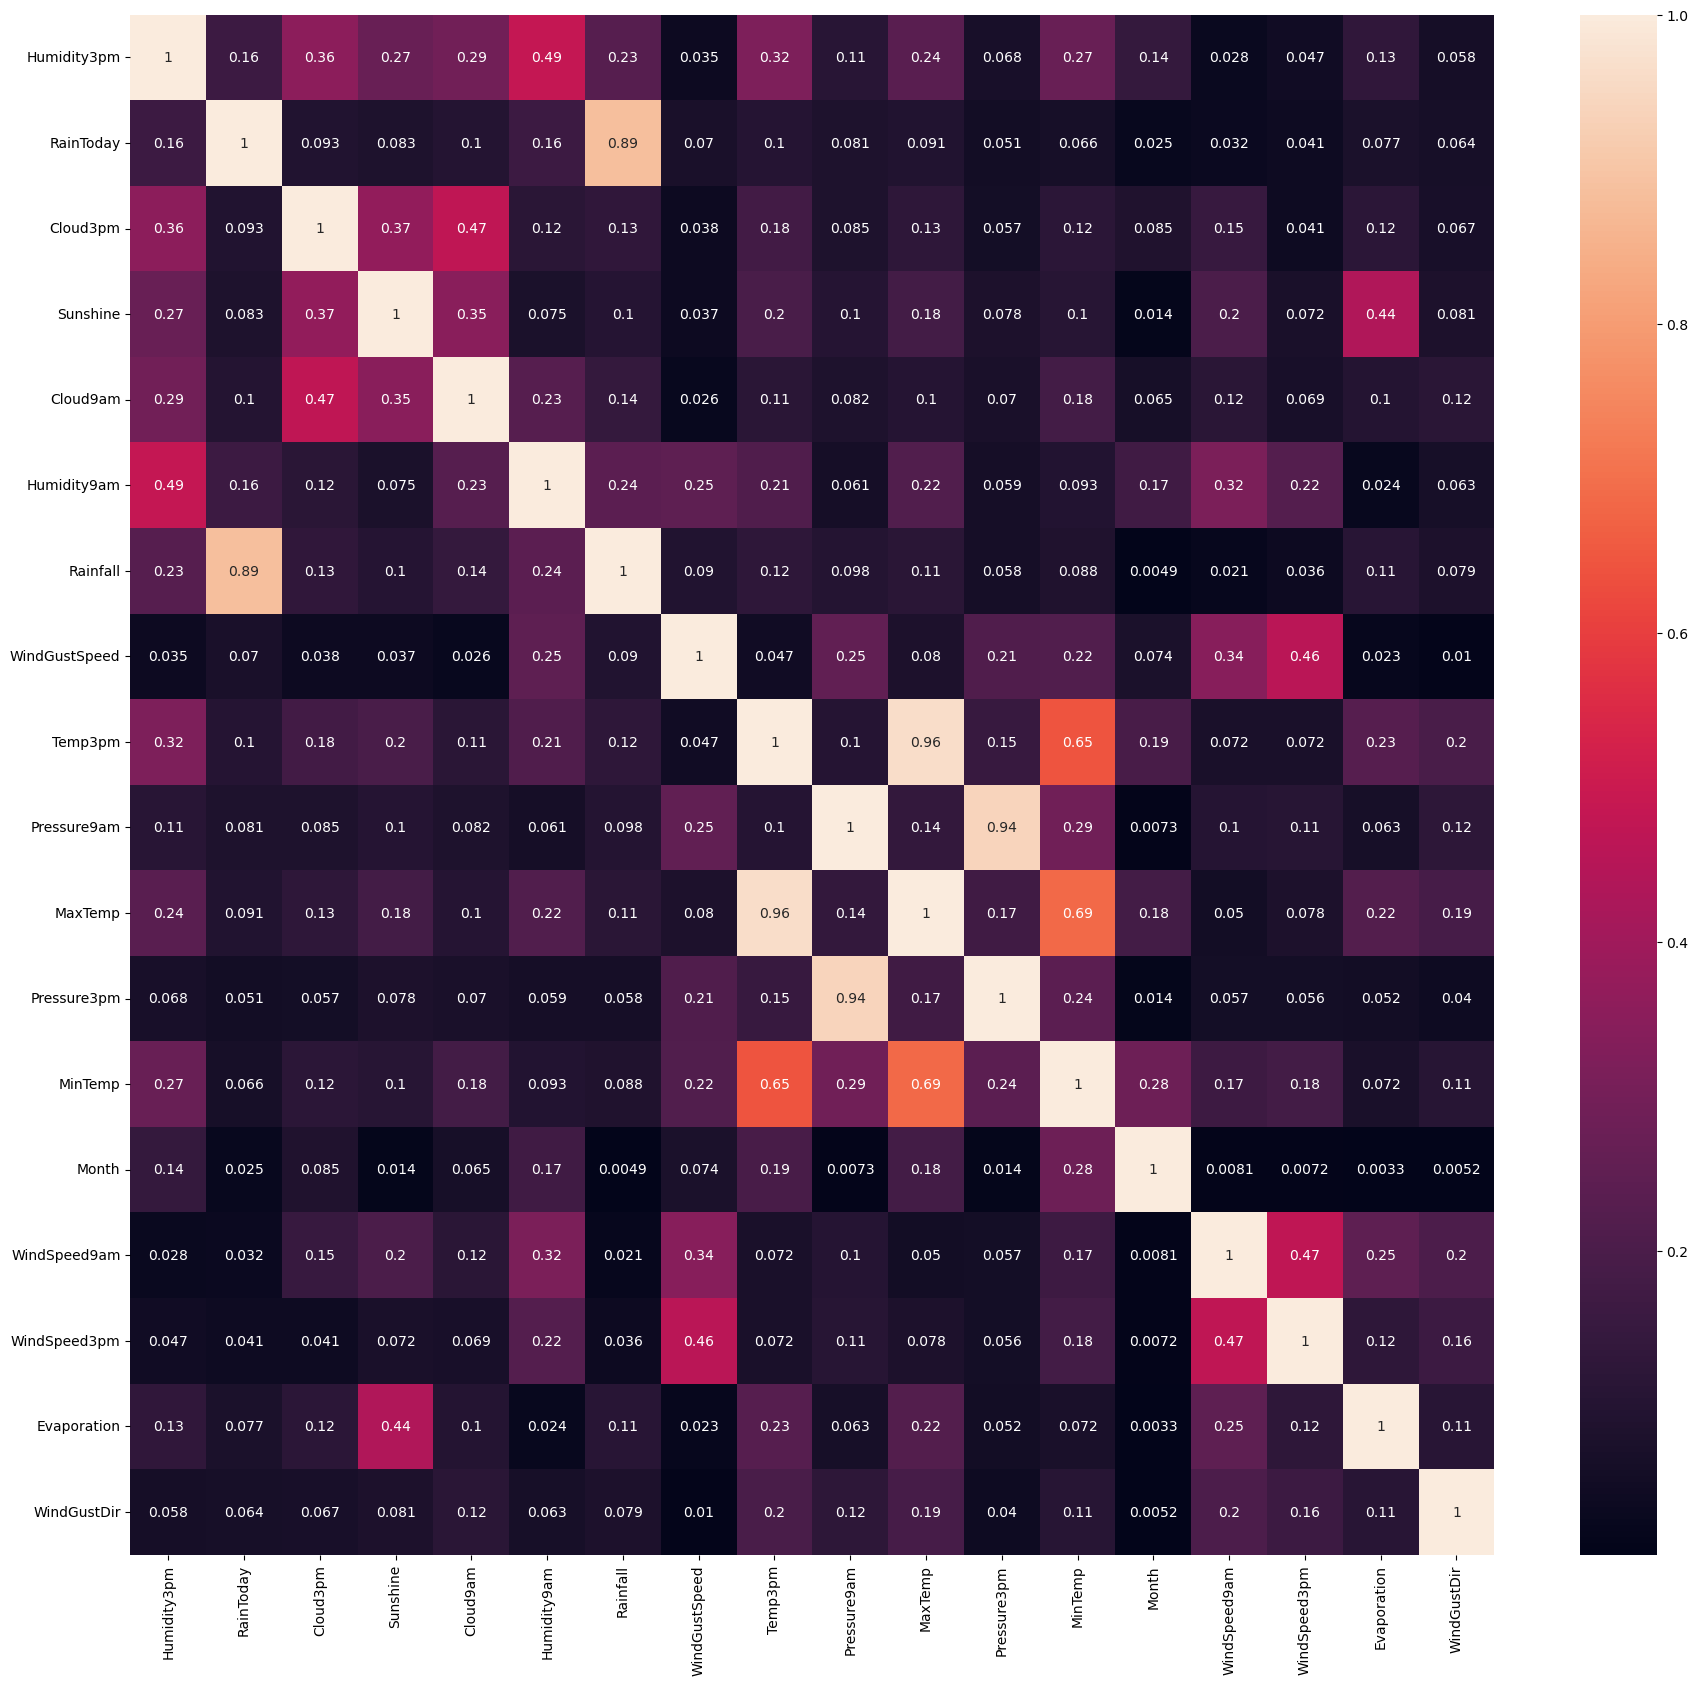

In [49]:
#Checking the co_relation between each columns 
x_corr = x_new.corr().abs()
plt.figure(figsize = (22,20))
sns.heatmap(x_corr,annot = True,annot_kws = {'size':10})
plt.show()

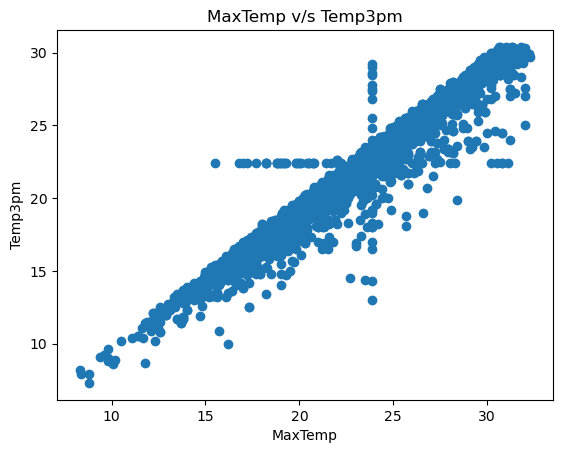

In [50]:
## plotting scatter plot to confirm co_relation between MaxTemp and Temp3pm
plt.scatter(x_new.MaxTemp,x_new.Temp3pm)
plt.xlabel('MaxTemp')
plt.ylabel('Temp3pm')
plt.title('MaxTemp v/s Temp3pm')
plt.show()

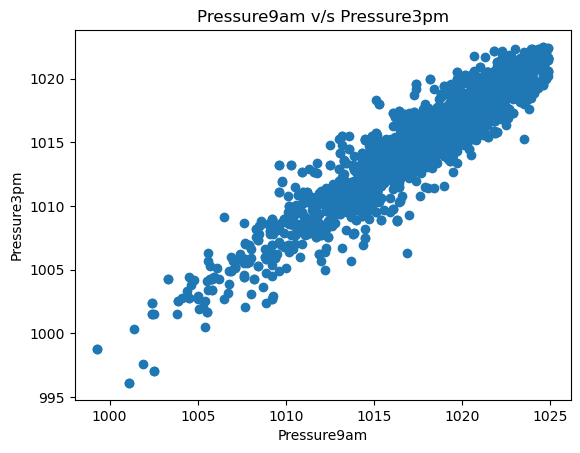

In [51]:
## plotting scatter plot to confirm co_relation between Pressure9am and Pressure3pm
plt.scatter(x_new.Pressure9am,x_new.Pressure3pm)
plt.xlabel('Pressure9am')
plt.ylabel('Pressure3pm')
plt.title('Pressure9am v/s Pressure3pm')
plt.show()

In [52]:
#Dropping the column which has high co_variance 
x_new.drop(columns = ['MaxTemp','Pressure3pm'],axis=1,inplace=True)

In [53]:
x_new.shape

(2669, 16)

In [54]:
x_new = x

In [56]:
## Transforming the into standard form using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x,y)

In [57]:
##splitting into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size = 0.25,random_state = 323)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# DecisionTreeClassifier

In [59]:
# Applying DecisonTreeClassifier Algorithm for classification problem
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
# Applying the Algorithm into training data
dtc.score(x_train,y_train)

1.0

In [61]:
# predicting the values
preddtc = dtc.predict(x_test)
preddtc

array([1., 0., 0., ..., 1., 0., 0.])

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(preddtc,y_test))
print(confusion_matrix(preddtc,y_test))
print(classification_report(preddtc,y_test))

0.8172757475083057
[[1412  177]
 [ 208  310]]
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1589
         1.0       0.64      0.60      0.62       518

    accuracy                           0.82      2107
   macro avg       0.75      0.74      0.75      2107
weighted avg       0.81      0.82      0.82      2107



In [63]:
#Cross validation score 
from sklearn.model_selection import cross_val_score
cross_val_score(dtc,x_sc,y,cv = 5)

array([0.7347181 , 0.81543027, 0.85637982, 0.73531157, 0.80474777])

In [64]:
cross_val_score(DecisionTreeClassifier(),x_sc,y,cv =5).mean()

0.780652818991098

In [65]:
# hyperparameter tunning for model better Accuracy using GridSerachCV
grid_param = {'criterion':['gini','entropy'],'max_depth' : range(2,6),'min_samples_leaf':range(1,6),'min_samples_split':range(1,7)}

In [67]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = dtc,param_grid = grid_param,cv = 5)

In [68]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 6),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(1, 7)})

In [69]:
#checking the best Parameter
best_param = grid_search.best_params_
print(best_param)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 6}


In [70]:
#Applying the best parameters into DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 5,min_samples_leaf = 4,min_samples_split = 5)

In [71]:
#Applying the best parameters into training data
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5)

In [72]:
#predicting the values with new Parameters
preddt = dt.predict(x_test)
preddt

array([0., 0., 0., ..., 1., 0., 0.])

In [73]:
print(accuracy_score(preddt,y_test))

0.8149027052681538


In [74]:
# Using KNeighborsClasssifer Algorithm for classification problem
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [75]:
#predicting the data using KNeighborsClasssifer
predknn = knn.predict(x_test)
predknn

array([0., 0., 0., ..., 1., 0., 0.])

In [76]:
print(accuracy_score(predknn,y_test))
print(confusion_matrix(predknn,y_test))
print(classification_report(predknn,y_test))

0.8310393925011865
[[1513  249]
 [ 107  238]]
              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89      1762
         1.0       0.49      0.69      0.57       345

    accuracy                           0.83      2107
   macro avg       0.71      0.77      0.73      2107
weighted avg       0.86      0.83      0.84      2107



In [77]:
#cross validation for cross checking the accuracy score
cross_val_score(KNeighborsClassifier(),x_sc,y,cv =5).mean()

0.7970326409495548

In [78]:
# hyperparameter tunning for model better Accuracy using GridSerachCV
param_grid = { 'algorithm' : ['kd_tree','brute'],'leaf_size' : [3,5,7,9,11,13],'n_neighbors' : [3,5,7,9,11,13,15]}

In [79]:
gri_se = GridSearchCV(estimator = knn,param_grid = param_grid)
gri_se.fit(x_train,y_train)
gri_se.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

In [80]:
#Using kdtree for nearest neighbor with leafsize 
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3 , n_neighbors = 13)

In [81]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=13)

In [82]:
#Predicting the values
pred_knn = knn.predict(x_test)
pred_knn

array([0., 0., 0., ..., 1., 0., 0.])

In [83]:
print(accuracy_score(pred_knn,y_test))
print(confusion_matrix(pred_knn,y_test))
print(classification_report(pred_knn,y_test))

0.8201233981964879
[[1526  285]
 [  94  202]]
              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89      1811
         1.0       0.41      0.68      0.52       296

    accuracy                           0.82      2107
   macro avg       0.68      0.76      0.70      2107
weighted avg       0.87      0.82      0.84      2107



In [85]:
#splitting labels and features
p = df1.drop(columns = ['Rainfall'])
q = df1['Rainfall']

In [86]:
p.shape

(8425, 24)

In [87]:
q.shape

(8425,)

In [88]:
p_new = p[['Humidity3pm','RainToday','Cloud3pm','Sunshine','Cloud9am','Humidity9am','RainTomorrow','WindGustSpeed','Temp3pm','Pressure9am','MinTemp','Month','WindSpeed9am','WindSpeed3pm','Evaporation','WindGustDir']]

In [89]:
p_new = p

In [90]:
#Transforming the dataset into standard form using StandardScaler 
scaler = StandardScaler()
x_scaler = scaler.fit_transform(p_new)

In [91]:
#splitting the data into training and testing 
p_train,p_test,q_train,q_test =  train_test_split(x_scaler,q,test_size = 0.25,random_state = 435)

In [92]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
#Using KNeighborsRegressor for regression problem
kn = KNeighborsRegressor()
kn.fit(p_train,q_train)

KNeighborsRegressor()

In [93]:
#predicting the value
predkn = kn.predict(p_test)
predkn

array([0.56118265, 9.52      , 0.08      , ..., 0.        , 0.        ,
       4.4       ])

In [94]:
#model Score
kn.score(p_test,q_test)

0.14124222004408704

In [96]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
#Mean Absolute error for checking the model error
print(mean_absolute_error(q_test,predkn))
print(mean_squared_error(q_test,predkn))
print(np.sqrt(mean_squared_error(q_test,predkn)))

2.5980713802987916
112.70629773437985
10.616322232034022


In [97]:
#Lasso CV 
lacv = LassoCV(alphas = None, max_iter = 1000,normalize = True)
lacv.fit(p_train,q_train)

LassoCV(normalize=True)

In [98]:
#alpha
alpha = lacv.alpha_
alpha

6.011279278163555e-05

In [99]:
#Lasso for model accuracy
las_knn = Lasso(alpha)
las_knn.fit(p_train,q_train)

Lasso(alpha=6.011279278163555e-05)

In [100]:
#Lasso Score 
las_knn.score(p_test,q_test)

0.18992951677269665

In [101]:
#RidgeCV score 
ridcv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridcv.fit(p_train,q_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [102]:
ridcv.alpha_

0.001

In [103]:
rd = Ridge(alpha = ridcv.alpha_)
rd.fit(p_train,q_train)

Ridge(alpha=0.001)

In [104]:
rd.score(p_test,q_test)

0.1899288364599485